In [38]:
import pandas as pd
import matplotlib.pyplot as plt

disgenet_data = pd.read_csv('braindisease.csv')

disgenet_data.head()
# print(f"Numero filas: {len(disgenet_data)}")

,Unnamed: 0,Gene,Gene_id,Disease,Disease_id,Score_gda,Association_Type
0,1,AVP,551,Amnesia,C0002622,0.30,Therapeutic
1,2,IL6,3569,Amnesia,C0002622,0.31,Therapeutic
2,3,HRH3,11255,Amnesia,C0002622,0.51,Biomarker
3,4,IL2,3558,Amnesia,C0002622,0.30,Biomarker
4,5,POMC,5443,Amnesia,C0002622,0.30,Biomarker


In [31]:
type(disgenet_data['Score_gda'].values)

numpy.ndarray

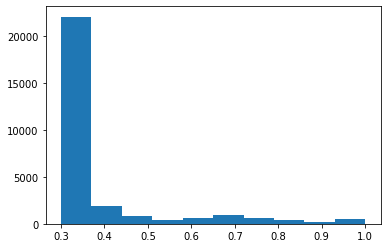

In [36]:
_ = plt.hist(disgenet_data['Score_gda'].values)

In [64]:
disgenet_cortado = disgenet_data.loc[disgenet_data['Score_gda'] > 0.7]
disgenet_cortado

,Unnamed: 0,Gene,Gene_id,Disease,Disease_id,Score_gda,Association_Type
658,1226,UBR1,197131,Johanson-Blizzard syndrome,C0175692,1.00,GermlineCausalMutation
659,1227,UBR1,197131,Johanson-Blizzard syndrome,C0175692,1.00,GeneticVariation
660,1230,UBR1,197131,Johanson-Blizzard syndrome,C0175692,1.00,Biomarker
689,1272,ANKRD11,29123,KBG syndrome,C0220687,0.80,Biomarker
690,1273,ANKRD11,29123,KBG syndrome,C0220687,0.80,GermlineCausalMutation
...,...,...,...,...,...,...,...
28472,59170,EGR2,1959,"NEUROPATHY, CONGENITAL HYPOMYELINATING, 1, AUT...",C4721436,0.80,GeneticVariation
28540,59259,ASS1,445,Citrullinemia Type 1,C4721769,0.80,Biomarker
28541,59260,ASS1,445,Citrullinemia Type 1,C4721769,0.80,GeneticVariation
28542,59287,MFN2,9927,"CHARCOT-MARIE-TOOTH DISEASE, AXONAL, AUTOSOMAL...",C4721887,0.81,GeneticVariation


In [62]:
# disgenet_cortado['Association_Type'].unique()
# for tipo in disgenet_cortado['Association_Type'].unique():
#     print(tipo)
print(disgenet_cortado.count())

Unnamed: 0          1982
Gene                1982
Gene_id             1982
Disease             1982
Disease_id          1982
Score_gda           1982
Association_Type    1982
dtype: int64
